In [ ]:
cred = {"username":"hanunshaka","key":"763365a03eae6d3aabd49c0a6a2559a5"}

In [ ]:
!mkdir ~/.kaggle/
!touch ~/.kaggle/kaggle.json

In [ ]:
api_token = cred
import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 !kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

 !unzip twitter-entity-sentiment-analysis.zip

In [1]:
import pandas as pd             # Untuk manipulasi dan analisis data I/O dataframe (ex read dataset)
import numpy as np              # Untuk operasi numerik dan komputasi
import matplotlib.pyplot as plt # Untuk visualisasi grafik dan plot
import seaborn as sns           # Dibangun di atas plt, menyediakan visualisasi yang lebih menarik
import warnings                 # Handling peringatan yang ditampilkan
warnings.filterwarnings("ignore")

In [ ]:
train_df = pd.read_csv('twitter_training.csv', error_bad_lines=False)
train_df.columns = ['TweetID', 'Entity', 'Sentiment', 'Content']
train_df

In [ ]:
train_df.info()

In [ ]:
test_df = pd.read_csv('twitter_validation.csv')
test_df.columns = ['TweetID', 'Entity', 'Sentiment', 'Content']
test_df

In [ ]:
test_df.info()

In [ ]:
nan_row = train_df[train_df['Content'].isna()]
nan_row

In [ ]:
train_df.drop(nan_row.index, axis=0, inplace=True)
train_df.info()

In [ ]:
train_duplicate = train_df[train_df.duplicated(subset=['Entity', 'Sentiment', 'Content'], keep=False)]
train_duplicate

In [ ]:
test_duplicate = test_df[test_df.duplicated(subset=['Entity', 'Sentiment', 'Content'], keep=False)]
test_duplicate

In [ ]:
train_df.drop(train_duplicate.index, axis=0, inplace=True)

In [ ]:
train_df.info()

In [ ]:
test_df.info()

In [ ]:
sentiment_counts = train_df['Sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')

plt.title('Sentiment Distribution Train')

plt.show()

## Data Selection

In [ ]:
train_df.drop('TweetID', axis=1, inplace=True)
# train_df.info()

### Emoji

In [ ]:
!pip install emoji
!pip install emot

In [ ]:
import re
import emoji
from tqdm import tqdm
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
import pandas as pd
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
tqdm.pandas()

def convert_emojis(text):
    text_list = word_tokenize(text)
    new_list = [UNICODE_EMOJI[word.lower()] if word.lower() in UNICODE_EMOJI.keys() else word for word in text_list]
    return  " ".join(new_list)

def convert_emoticons(text):
    text_list = word_tokenize(text)
    new_list = [EMOTICONS_EMO[word.lower()] if word.lower() in EMOTICONS_EMO.keys() else word for word in text_list]
    return  " ".join(new_list)


# Apply transformations with progress bars
train_df['emo_content'] = train_df['Content'].progress_apply(convert_emojis)
train_df['emo_cotent'] = train_df['Content'].progress_apply(convert_emoticons)

test_df['emo_content'] = test_df['Content'].progress_apply(convert_emojis)
test_df['emo_cotent'] = test_df['Content'].progress_apply(convert_emoticons)

train_df['emo_content']


In [ ]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
def convert_abbrev(word):
    word_list = word_tokenize(word)
    new_list = [abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word for word in word_list]
    return " ".join(new_list)

train_df['abbrev_content'] = train_df['emo_content'].apply(convert_abbrev)
test_df['abbrev_content'] = test_df['emo_content'].apply(convert_abbrev)

In [ ]:
import re
import string
import pandas as pd

def remove_extra(input_string):
    #Remove link
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text_without_link = re.sub(url_pattern, '', input_string)

    # Remove "@" symbols
    text_without_ad = text_without_link.replace('@', '')

    #Remove Hastag
    hashtag_pattern = re.compile(r'#\w+')
    text_without_hastag = re.sub(hashtag_pattern, '', text_without_ad)

    punctuation_except_comma_period = '[%s]' % re.escape(''.join(c for c in string.punctuation))
    text_without_special_char = re.sub(punctuation_except_comma_period, '', text_without_hastag)

    text_without_extra_space = re.sub(' +', ' ', text_without_special_char)
    return text_without_extra_space

train_df['delete_extra'] = train_df['abbrev_content'].apply(remove_extra)
test_df['delete_extra'] = test_df['abbrev_content'].apply(remove_extra)
train_df['delete_extra']

In [ ]:
!pip install contractions

In [ ]:
import contractions
def expand_shortcut(text) :
    expanded_words = []
    for word in text.split():
        expanded_words.append(contractions.fix(word))

    return ' '.join(expanded_words)

train_df['expanded_content'] = train_df['delete_extra'].apply(expand_shortcut)
test_df['expanded_content'] = test_df['delete_extra'].apply(expand_shortcut)

train_df['expanded_content']

In [ ]:
train_df['lower_content'] = train_df['expanded_content'].apply(lambda x: x.lower())
test_df['lower_content'] = test_df['expanded_content'].apply(lambda x: x.lower())

train_df['lower_content']

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
from nltk.tokenize import word_tokenize

train_df['tokenized_content'] = train_df['lower_content'].apply(word_tokenize)
test_df['tokenized_content'] = test_df['lower_content'].apply(word_tokenize)

train_df['tokenized_content']

In [ ]:
import nltk
import subprocess

try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return [lemmatizer.lemmatize(word) for word in text]
train_df['lemma_content'] = train_df['tokenized_content'].apply(lemmatize_words)
test_df['lemma_content'] = test_df['tokenized_content'].apply(lemmatize_words)

train_df['lemma_content']

In [ ]:
train_df['lemma_content'][11]

In [ ]:
!apt update
!apt search enchant
!apt install -y enchant-2
!apt install -qq enchant -y
!pip install pyenchant

In [ ]:
import enchant
from tqdm import tqdm
tqdm.pandas()

def is_valid_word(word):
    dictionary = enchant.Dict("en_US")
    return dictionary.check(word)

def check_en_word(li):
    new_list = [w for w in li if is_valid_word(w)]
    return new_list

train_df['en_content'] = train_df['lemma_content'].progress_apply(check_en_word)
test_df['en_content'] = test_df['lemma_content'].progress_apply(check_en_word)


In [ ]:
train_df['en_content']
# train_df

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

In [ ]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    filtered_sentence = [w for w in text if not w.lower() in stop_words]
    return filtered_sentence

train_df['remove_stopwords'] = train_df['en_content'].apply(remove_stopwords)
test_df['remove_stopwords'] = test_df['en_content'].apply(remove_stopwords)

train_df['remove_stopwords']

In [ ]:
# train_df[['Sentiment', 'remove_stopwords']]
train_df

In [ ]:
duplicated = train_df[train_df.duplicated(subset=['remove_stopwords'], keep=False)]
duplicated

In [ ]:
train_df.drop(duplicated.index, axis=0, inplace=True)

In [ ]:
train_df

In [ ]:
from ast import literal_eval

def combine_list(entity, lst):
    str_list = ' '.join(lst)

    return f'{entity} [SEP] {str_list}'

train_df.loc[:,'final_result'] = train_df.apply(lambda x: combine_list(x['Entity'], x['en_content']), axis=1)
test_df.loc[:,'final_result'] = test_df.apply(lambda x: combine_list(x['Entity'], x['en_content']), axis=1)
test_df['final_result']
train_df['final_result']

##Explanatory Data Analysis

In [ ]:
sentiment_counts = train_df['Sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')

plt.title('Sentiment Distribution Train')

plt.show()



> Indented block



In [ ]:
#Word Count
train_df['Word_Count'] = train_df.apply(lambda x: len(str(x['Content']).split()), axis=1)
train_df['Word_Count'].mean()

In [ ]:
fig = plt.figure(figsize=(21,9))

n = 1

for i in range(len(train_df['Sentiment'].unique())):
  plt.subplot(1, len(train_df['Sentiment'].unique()), n)
  n += 1
  sns.histplot(x = "Word_Count", data=train_df[train_df['Sentiment'] == train_df['Sentiment'].unique()[i]])
  plt.title(f'Word Count {train_df["Sentiment"].unique()[i]}')
plt.show()

##Analysis Number Of Stopwords

In [ ]:
# #NEGATIVE

# neg_train_df = train_df[train_df["Sentiment"] == "Negative"]["Content"]

# neg_train_words = ' '.join(neg_train_df)
# neg_train_words = re.sub(r'[^\w\s]', '', neg_train_words.lower())


# neg_train_words = neg_train_words.split()

# word_freq = Counter(word for word in neg_train_words if word not in STOPWORDS)
# word_freq.most_common(10)

In [ ]:
# #NEUTRAL

# neu_train_df = train_df[train_df["Sentiment"] == "Neutral"]["Content"]

# neu_train_words = ' '.join(neu_train_df)
# neu_train_words = re.sub(r'[^\w\s]', '', neu_train_words.lower())

# neu_train_words = neu_train_words.split()

# word_freq = Counter(word for word in neu_train_words if word not in STOPWORDS)
# word_freq.most_common(10)

In [ ]:
# #IRRELEVANT

# irr_train_df = train_df[train_df["Sentiment"] == "Irrelevant"]["Content"]

# irr_train_words = ' '.join(irr_train_df)
# irr_train_words = re.sub(r'[^\w\s]', '', irr_train_words.lower())

# irr_train_words = irr_train_words.split()

# word_freq = Counter(word for word in irr_train_words if word not in STOPWORDS)
# word_freq.most_common(10)

##Modeling


### XLNet

In [8]:
!pip install transformers
!pip install sentencepiece

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import TFXLNetModel, XLNetTokenizer
from keras.preprocessing.sequence import pad_sequences

In [10]:
# Load and preprocess the data
train_df = pd.read_csv('processed_train_df.csv')
train_df = train_df[["Entity", "en_content", "Sentiment"]]

train_df.columns = ["Entity", "Content", "Sentiment"]

train_df

,Entity,Content,Sentiment
0,Borderlands,"['i', 'be', 'come', 'to', 'the', 'border', 'an...",Positive
1,Borderlands,"['i', 'be', 'get', 'on', 'borderland', 'and', ...",Positive
2,Borderlands,"['i', 'be', 'come', 'on', 'borderland', 'and',...",Positive
3,Borderlands,"['i', 'be', 'get', 'on', 'borderland', '2', 'a...",Positive
4,Borderlands,"['i', 'be', 'get', 'into', 'borderland', 'and'...",Positive
...,...,...,...
51468,Nvidia,"['my', 'be', 'no', 'highlight', 'picture', 're...",Positive
51469,Nvidia,"['just', 'realize', 'that', 'my', 'mac', 'wind...",Positive
51470,Nvidia,"['just', 'realize', 'the', 'window', 'partitio...",Positive
51471,Nvidia,"['just', 'realize', 'between', 'the', 'window'...",Positive


In [11]:
# Load and preprocess the data
test_df = pd.read_csv('processed_test_df.csv')
test_df = test_df[["Entity", "en_content", "Sentiment"]]

test_df.columns = ["Entity", "Content", "Sentiment"]

test_df

,Entity,Content,Sentiment
0,Amazon,"['broadcasting', 'corporation', 'news', 'amazo...",Neutral
1,Microsoft,"['why', 'do', 'i', 'pay', 'for', 'word', 'when...",Negative
2,CS-GO,"['matchmaking', 'be', 'so', 'full', 'of', 'clo...",Negative
3,Google,"['now', 'the', 'president', 'be', 'slap', 'in'...",Neutral
4,FIFA,"['hi', 'i', 'have', 'in', 'my', 'cellar', 'for...",Negative
...,...,...,...
994,GrandTheftAuto(GTA),"['be', 'the', 'art', 'and', 'culture', 'capita...",Irrelevant
995,CS-GO,"['this', 'be', 'actually', 'a', 'good', 'move'...",Irrelevant
996,Borderlands,"['today', 'suck', 'so', 'it', 's', 'time', 'to...",Positive
997,Microsoft,"['buy', 'a', 'fraction', 'of', 'today', 'small...",Positive


In [12]:
from ast import literal_eval

def combine_list(entity, lst):
    actual_list = literal_eval(lst)
    str_list = ' '.join(actual_list)

    return f'{entity.lower()} : {str_list}'

train_df.loc[:, 'Content'] = train_df.apply(lambda x: combine_list(x['Entity'], x['Content']), axis=1)
test_df.loc[:, 'Content'] = test_df.apply(lambda x: combine_list(x['Entity'], x['Content']), axis=1)

In [13]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')
model = TFXLNetModel.from_pretrained('xlnet-base-cased')

# Load and preprocess the data
# train_df = train_df[["Entity", "en_content", "Sentiment"]]

# train_df.columns = ["Entity", "Content", "Sentiment"]

# data = train_df

# data['Sentiment_label'] = pd.Categorical(data['Sentiment'])
# data['Sentiment'] = data['Sentiment_label'].cat.codes

# Split the data into training and testing sets
# data_train, data_val = train_test_split(data, test_size=0.2)

# # Load and preprocess the data
data_train = train_df[['Content', 'Sentiment']]
data_train['Sentiment_label'] = pd.Categorical(data_train['Sentiment'])
data_train['Sentiment'] = data_train['Sentiment_label'].cat.codes

# # Split the data into training and validation sets
data_val = test_df[['Content', 'Sentiment']]
data_val['Sentiment_label'] = pd.Categorical(data_val['Sentiment'])
data_val['Sentiment'] = data_val['Sentiment_label'].cat.codes

# Extract the training and validation texts and labels
train_texts = data_train['Content'].tolist()
train_labels = data_train['Sentiment'].tolist()
val_texts = data_val['Content'].tolist()
val_labels = data_val['Sentiment'].tolist()

# Extract the training and testing texts and labels
train_texts = data_train['Content'].tolist()
train_labels = data_train['Sentiment'].tolist()
val_texts = data_val['Content'].tolist()
val_labels = data_val['Sentiment'].tolist()

# Tokenize the texts
# Modified code starts here
from keras.preprocessing.sequence import pad_sequences

train_encodings = tokenizer(train_texts, truncation=True, padding=False, max_length=64)
val_encodings = tokenizer(val_texts, truncation=True, padding=False, max_length=64)

train_input_ids = pad_sequences(train_encodings['input_ids'], maxlen=64, padding='post')
train_attention_mask = pad_sequences(train_encodings['attention_mask'], maxlen=64, padding='post')

val_input_ids = pad_sequences(val_encodings['input_ids'], maxlen=64, padding='post')
val_attention_mask = pad_sequences(val_encodings['attention_mask'], maxlen=64, padding='post')
# Modified code ends here

# Convert the labels to one-hot encoding
num_labels = len(data_train['Sentiment_label'].cat.categories)
train_labels_encoded = tf.one_hot(train_labels, num_labels)
val_labels_encoded = tf.one_hot(val_labels, num_labels)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': train_input_ids, 'attention_mask': train_attention_mask}, train_labels_encoded))
val_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': val_input_ids, 'attention_mask': val_attention_mask}, val_labels_encoded))

# Define the model architecture
input_ids = tf.keras.layers.Input(shape=(64,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(64,), dtype=tf.int32, name='attention_mask')
output = model(input_ids=input_ids, attention_mask=attention_mask)[0]
output = tf.keras.layers.Dense(num_labels, activation='softmax')(output[:, 0, :])  # Pooling the output
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-6)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

# Define the ModelCheckpoint callback to save the best weights
checkpoint_filepath = 'xlnet.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Use smaller batch size
batch_size = 16
epochs = 10

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with early stopping and model checkpoint
history = model.fit(
    train_dataset.batch(batch_size),
    epochs=epochs,
    validation_data=val_dataset.batch(batch_size),
    callbacks=[model_checkpoint]
)

# Evaluate the model
model.evaluate(val_dataset.batch(batch_size))


c:\Users\andrian21\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification

Epoch 1/10


c:\Users\andrian21\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3218/3218 [==============================] - ETA: 0s - loss: 1.1941 - accuracy: 0.4991
Epoch 1: val_loss improved from inf to 1.15765, saving model to xlnet.h5


c:\Users\andrian21\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3218/3218 [==============================] - 5135s 2s/step - loss: 1.1941 - accuracy: 0.4991 - val_loss: 1.1577 - val_accuracy: 0.5676
Epoch 2/10
3218/3218 [==============================] - ETA: 0s - loss: 1.0141 - accuracy: 0.5879
Epoch 2: val_loss improved from 1.15765 to 1.04239, saving model to xlnet.h5
3218/3218 [==============================] - 5146s 2s/step - loss: 1.0141 - accuracy: 0.5879 - val_loss: 1.0424 - val_accuracy: 0.6176
Epoch 3/10
3218/3218 [==============================] - ETA: 0s - loss: 0.8996 - accuracy: 0.6383
Epoch 3: val_loss improved from 1.04239 to 0.87850, saving model to xlnet.h5
3218/3218 [==============================] - 5409s 2s/step - loss: 0.8996 - accuracy: 0.6383 - val_loss: 0.8785 - val_accuracy: 0.6717
Epoch 4/10
3218/3218 [==============================] - ETA: 0s - loss: 0.7757 - accuracy: 0.6954
Epoch 4: val_loss improved from 0.87850 to 0.71588, saving model to xlnet.h5
3218/3218 [==============================] - 5625s 2s/step - loss: 0.7

[0.4090360105037689, 0.8968968987464905]

16/16 [==============================] - 23s 1s/step
Validation Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.64      0.56      0.59       171
    Negative       0.97      0.62      0.75       266
     Neutral       0.61      0.92      0.73       285
    Positive       0.84      0.76      0.80       277

    accuracy                           0.73       999
   macro avg       0.76      0.71      0.72       999
weighted avg       0.77      0.73      0.73       999



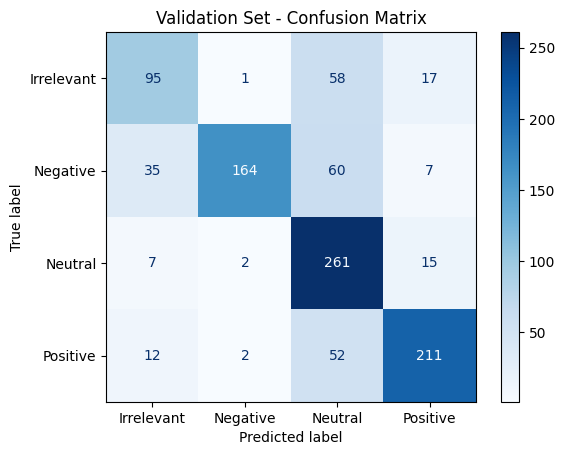

Test Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.64      0.56      0.59       171
    Negative       0.97      0.62      0.75       266
     Neutral       0.61      0.92      0.73       285
    Positive       0.84      0.76      0.80       277

    accuracy                           0.73       999
   macro avg       0.76      0.71      0.72       999
weighted avg       0.77      0.73      0.73       999



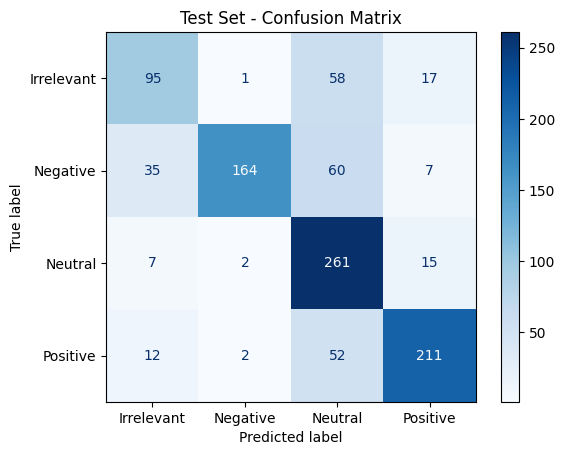

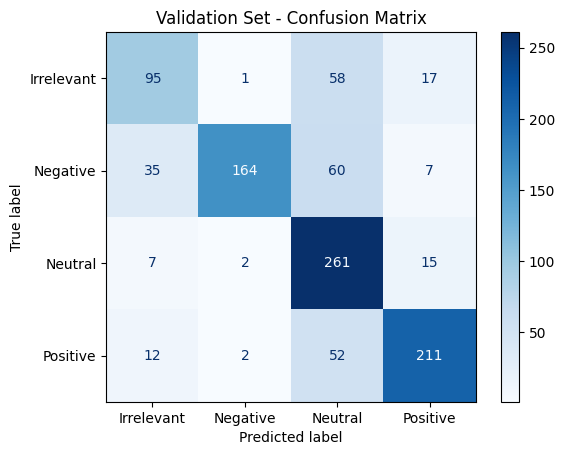

Test Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.64      0.56      0.59       171
    Negative       0.97      0.62      0.75       266
     Neutral       0.61      0.92      0.73       285
    Positive       0.84      0.76      0.80       277

    accuracy                           0.73       999
   macro avg       0.76      0.71      0.72       999
weighted avg       0.77      0.73      0.73       999



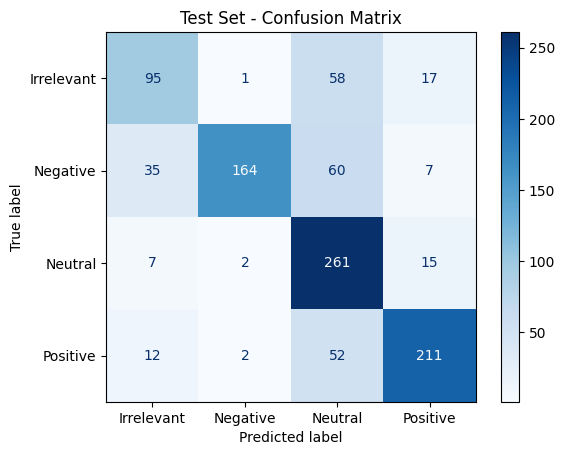

In [23]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# Load and preprocess the data
data_test = test_df[['Content', 'Sentiment']]
data_test['Sentiment_label'] = pd.Categorical(data_test['Sentiment'])
data_test['Sentiment'] = data_test['Sentiment_label'].cat.codes

test_texts = data_test['Content'].tolist()
test_labels = data_test['Sentiment'].tolist()

test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=64)

# Convert the labels to one-hot encoding
num_labels = len(data_test['Sentiment_label'].cat.categories)
val_labels_encoded = tf.one_hot(val_labels, num_labels)
test_labels_encoded = tf.one_hot(test_labels, num_labels)

# Create TensorFlow datasets
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_encoded))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels_encoded))

val_predictions = model.predict(val_dataset.batch(64))
val_predicted_labels = np.argmax(val_predictions, axis=1)
test_predictions = model.predict(test_dataset.batch(64))
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert the predicted labels to their original sentiment categories
val_predicted_sentiments = data_val['Sentiment_label'].cat.categories[val_predicted_labels]
test_predicted_sentiments = data_test['Sentiment_label'].cat.categories[test_predicted_labels]

# Convert the true labels to their original sentiment categories
val_true_labels = data_val['Sentiment_label']
test_true_labels = data_test['Sentiment_label']

# Calculate the classification report for the validation set
val_classification_rep = classification_report(val_true_labels, val_predicted_sentiments)
print("Validation Set - Classification Report:\n", val_classification_rep)

# Generate the confusion matrix for the valing set
val_confusion_mat = confusion_matrix(val_true_labels, val_predicted_sentiments)

# Get the unique labels/categories from the true labels
labels = np.unique(val_true_labels)

# Plot the confusion matrix for the valing set
val_display = ConfusionMatrixDisplay(confusion_matrix=val_confusion_mat, display_labels=labels)
val_display.plot(cmap='Blues')
plt.title("Validation Set - Confusion Matrix")
plt.grid(False)
plt.show()

# Calculate the classification report for the test set
test_classification_rep = classification_report(test_true_labels, test_predicted_sentiments)
print("Test Set - Classification Report:\n", test_classification_rep)

# Generate the confusion matrix for the test set
test_confusion_mat = confusion_matrix(test_true_labels, test_predicted_sentiments)

# Plot the confusion matrix for the test set
test_display = ConfusionMatrixDisplay(confusion_matrix=test_confusion_mat, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
plt.show()


save_folder = 'xlnet'
os.makedirs(save_folder, exist_ok=True)
val_report_path = os.path.join(save_folder, 'validation_classification_report.txt')
with open(val_report_path, 'w') as file:
    file.write("Validation Set - Classification Report:\n")
    file.write(val_classification_rep)

# Plot the confusion matrix for the validation set
val_display = ConfusionMatrixDisplay(confusion_matrix=val_confusion_mat, display_labels=labels)
val_display.plot(cmap='Blues')
plt.title("Validation Set - Confusion Matrix")
plt.grid(False)
val_image_path = os.path.join(save_folder, 'validation_confusion_matrix.png')
plt.savefig(val_image_path)
plt.show()

# Calculate the classification report for the test set
test_classification_rep = classification_report(test_true_labels, test_predicted_sentiments)
print("Test Set - Classification Report:\n", test_classification_rep)

# Save the classification report for the test set to a file
test_report_path = os.path.join(save_folder, 'test_classification_report.txt')
with open(test_report_path, 'w') as file:
    file.write("Test Set - Classification Report:\n")
    file.write(test_classification_rep)

# Plot the confusion matrix for the test set
test_display = ConfusionMatrixDisplay(confusion_matrix=test_confusion_mat, display_labels=labels)
test_display.plot(cmap='Blues')
plt.title("Test Set - Confusion Matrix")
plt.grid(False)
test_image_path = os.path.join(save_folder, 'test_confusion_matrix.png')
plt.savefig(test_image_path)
plt.show()

c:\Users\andrian21\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\functional.py:642: UserWarning: Input dict contained keys ['token_type_ids'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


16/16 [==============================] - 25s 1s/step
Training Set - Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.64      0.56      0.59       171
    Negative       0.97      0.62      0.75       266
     Neutral       0.61      0.92      0.73       285
    Positive       0.84      0.76      0.80       277

    accuracy                           0.73       999
   macro avg       0.76      0.71      0.72       999
weighted avg       0.77      0.73      0.73       999



NameError: name 'plt' is not defined

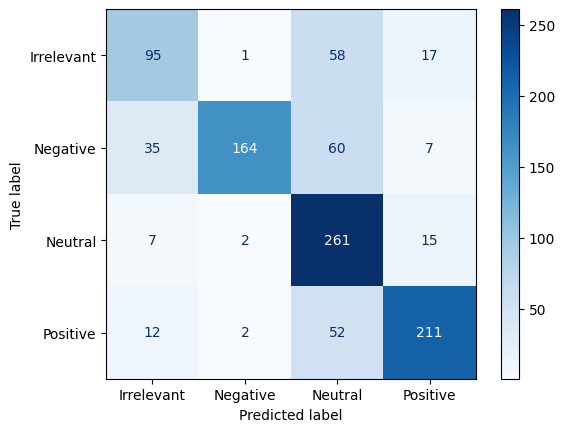

In [20]:
# Load and preprocess the data
data_val = test_df[['Content', 'Sentiment']]
data_val['Sentiment_label'] = pd.Categorical(data_val['Sentiment'])
data_val['Sentiment'] = data_val['Sentiment_label'].cat.codes

# Extract the training and testing texts and labels
val_texts = data_val['Content'].tolist()
val_labels = data_val['Sentiment'].tolist()

# Tokenize the texts
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=64)

# Convert the labels to one-hot encoding
num_labels = len(data_val['Sentiment_label'].cat.categories)
val_labels_encoded = tf.one_hot(val_labels, num_labels)

# Create TensorFlow datasets
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels_encoded))

# Make predictions on the training and test datasets

val_predictions = model.predict(val_dataset.batch(64))
val_predicted_labels = np.argmax(val_predictions, axis=1)

# Convert the predicted labels to their original sentiment categories
val_predicted_sentiments = data_val['Sentiment_label'].cat.categories[val_predicted_labels]

# Convert the true labels to their original sentiment categories
val_true_labels = data_val['Sentiment_label']

# Calculate the classification report for the training set
val_classification_rep = classification_report(val_true_labels, val_predicted_sentiments)
print("Training Set - Classification Report:\n", val_classification_rep)

# Generate the confusion matrix for the training set
val_confusion_mat = confusion_matrix(val_true_labels, val_predicted_sentiments)

# Get the unique labels/categories from the true labels
labels = np.unique(val_true_labels)

# Plot the confusion matrix for the training set
val_display = ConfusionMatrixDisplay(confusion_matrix=val_confusion_mat, display_labels=labels)
val_display.plot(cmap='Blues')
plt.title("Validation Set - Confusion Matrix")
plt.grid(False)
plt.show()

NameError: name 'model' is not defined